In [125]:
import pickle as pkl
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import cv2

In [126]:
def drawRectangleOnImage(img, box, color=(0, 255, 0)):
    img = cv2.rectangle(img, (box[0], box[1]), (box[2], box[3]), color, 3)
    return img

In [127]:
# Detection Pre-Processing 

# Remove overlaps in the same frame
def remove_overlaps(detections_pd, tolerance=0.9):
    row_to_remove = []
    for detection in detections_pd.get('detection'):
        length, _ =detections_pd.shape
        for i in range(length):
            IoU = detection.IoU(detections_pd.iloc[i]['detection'])
            if IoU > tolerance and IoU < 1:
                row_to_remove.append(i)
                
    row_to_remove = np.unique(np.array(row_to_remove))
    detections_pd = detections_pd.drop(index=row_to_remove)
        
    return detections_pd

In [128]:
# Detection to DataFrame
def get_detection_dataframe(detections):
    bboxes = []
    bsizes = []
    bdetections = []
    track = list(range(0, len(detections)))
    for detection in detections:
        bbox = np.array(detection.getBBox()).astype('int')
        bboxes.append(bbox)

        bsize = int(detection.areaOfRec())
        bsizes.append(bsize)

        bdetections.append(detection)

    detec = {
        'track': track,
        'detection': bdetections,
        'bbox': bboxes,
        'size': bsizes,
    }
    detections_pd = pd.DataFrame(detec)
    detections_pd = detections_pd.sort_values(by=['size'], ascending=False)
    detections_pd = detections_pd.reset_index(drop=True)
    
    return detections_pd

In [129]:
# Load paths
file_path = 'detection_pkls/retinanet_101_detections.pkl'
data_path = '../datasets/AICity_data/train/S03/c010/'

# Load detections
with open(file_path , 'rb') as f:
    all_detections = pkl.load(f)

In [130]:
detections_pd = get_detection_dataframe(all_detections['0'])
detections_pd

,track,detection,bbox,size
0,0,"Frame 0, TL [1284.8372802734375,362.1326904296...","[1284, 362, 1520, 539]",41907
1,6,"Frame 0, TL [542.8624877929688,68.340904235839...","[542, 68, 631, 159]",8089
2,1,"Frame 0, TL [564.6638793945312,96.273307800292...","[564, 96, 658, 168]",6779
3,11,"Frame 0, TL [560.3693237304688,74.730484008789...","[560, 74, 656, 135]",5833
4,2,"Frame 0, TL [928.7540283203125,78.073799133300...","[928, 78, 1014, 145]",5791
5,20,"Frame 0, TL [370.3283996582031,31.751697540283...","[370, 31, 451, 99]",5548
6,8,"Frame 0, TL [895.2154541015625,88.084892272949...","[895, 88, 961, 141]",3582
7,9,"Frame 0, TL [1178.972412109375,103.75167846679...","[1178, 103, 1228, 164]",3049
8,10,"Frame 0, TL [848.9981079101562,96.455963134765...","[848, 96, 916, 140]",3013
9,5,"Frame 0, TL [579.739501953125,74.2380752563476...","[579, 74, 658, 110]",2870


In [131]:
detections_pd = remove_overlaps(detections_pd, 0.4)
detections_pd

,track,detection,bbox,size
0,0,"Frame 0, TL [1284.8372802734375,362.1326904296...","[1284, 362, 1520, 539]",41907
2,1,"Frame 0, TL [564.6638793945312,96.273307800292...","[564, 96, 658, 168]",6779
5,20,"Frame 0, TL [370.3283996582031,31.751697540283...","[370, 31, 451, 99]",5548
7,9,"Frame 0, TL [1178.972412109375,103.75167846679...","[1178, 103, 1228, 164]",3049
17,14,"Frame 0, TL [508.15423583984375,107.4099197387...","[508, 107, 534, 139]",838
18,16,"Frame 0, TL [1493.60888671875,86.6675491333007...","[1493, 86, 1520, 108]",586
19,18,"Frame 0, TL [838.2875366210938,78.842559814453...","[838, 78, 861, 102]",560
20,17,"Frame 0, TL [687.8651123046875,63.630992889404...","[687, 63, 704, 85]",357


In [132]:
ims = []
num_frames = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))

for frame in tqdm(range(1,num_frames-1)):
    _, image = vidcap.read()
    
    
    
    if gif:
        im = ax.imshow(fgmask, animated=True)
        ims.append([im])
# break

if gif:
    ani = animation.ArtistAnimation(fig, ims, interval=10, blit=True, repeat_delay=10000)
    ani.save(videoName + ".gif", writer=animation.PillowWriter(fps=24))

NameError: name 'tqdm' is not defined

In [133]:
# Load video
vidcap = cv2.VideoCapture(data_path + 'vdo.avi')
_, image = vidcap.read()

for bbox in detections_pd['bbox']:
    image = drawRectangleOnImage(image, bbox, color=(0, 255, 0))

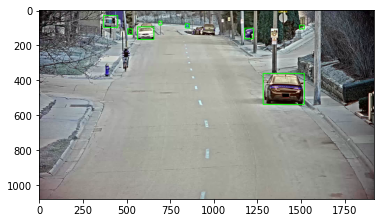

In [134]:
plt.imshow(image)